## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf

## Reading train labels

In [2]:
df_train = pd.read_csv(r'C:\Users\HP\Desktop\Fall\whole_data\train.csv', index_col='file_name')
df_train

,label
file_name,
1.jpg,1
2.jpg,0
3.jpg,0
5.jpg,1
6.jpg,0
...,...
16987.jpg,0
16988.jpg,0
16989.jpg,1


## Reading test labels

In [3]:
test_df = pd.read_csv(r'C:\Users\HP\Desktop\Fall\whole_data\test.csv', index_col='file_name')
test_df

,label
file_name,
4.jpg,0
116.jpg,1
133.jpg,1
287.jpg,1
385.jpg,1
...,...
16517.jpg,1
16634.jpg,1
16782.jpg,1


In [4]:
# reading train and test images from the folder and stacking them while keep tracking of corresponding labels
dataset_folder = 'C:/Users/HP/Desktop/Fall/whole_data/'
train_images = []
train_labels = []
test_images = []
test_labels = []

for folder in os.listdir(dataset_folder):
    folder_path = os.path.join(dataset_folder, folder)
    if folder == 'train_images':
        for file in os.listdir(folder_path):
            if file.endswith('jpg'):
                img_path = os.path.join(folder_path, file)
                img = cv2.imread(img_path)
                train_images.append(img)
                train_labels.append(df_train.loc[file, 'label'])
    
    elif folder == 'test_images':
        for file in os.listdir(folder_path):
            if file.endswith('jpg'):
                img_path = os.path.join(folder_path, file)
                img = cv2.imread(img_path)
                test_images.append(img)
                test_labels.append(test_df.loc[file, 'label'])
    else:
        pass
            
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)
print('Shape of stacked train images:', train_images.shape)
print('Shape of train labels:', train_labels.shape)
print('Shape of stacked test images:', test_images.shape)
print('Shape of test labels:', test_labels.shape)

Shape of stacked train images: (16657, 256, 256, 3)
Shape of train labels: (16657,)
Shape of stacked test images: (333, 256, 256, 3)
Shape of test labels: (333,)


## Visualizing some images together with their label to have an idea about our data

In [5]:
# Function to convert binary label into text
def get_label(num):
    if num == 0:
        return 'FALL'
    if num == 1:
        return 'NOT FALL'
    else:
        return -1

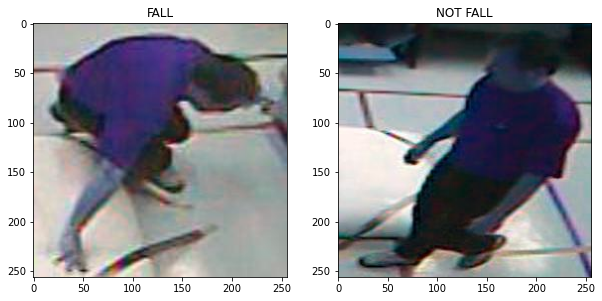

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), squeeze=False)
axes[0][0].imshow(train_images[2])
axes[0][0].set_title(get_label(train_labels[2]))

axes[0][1].imshow(train_images[3])
axes[0][1].set_title(get_label(train_labels[3]));

## Splitting our data into train and validation sets, building and training our model

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, stratify=train_labels, test_size=0.3)

In [8]:
def conv2d(filters: int, name):
    return Conv2D(filters=filters, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.), bias_regularizer=l2(0.), name=name)

In [9]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, ReLU
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.regularizers import l2

# fallnet architecture
model_input = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), name='inputs')

conv1 = conv2d(16, name='convoluton_1')(model_input)
act1 = ReLU(name='activation_1')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2), name='pooling_1')(act1)

conv2 = conv2d(16, name='convolution_2')(pool1)
act2 = ReLU(name='activation_2')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2), name='pooling_2')(act2)

conv3 = conv2d(32, name='convolution_3')(pool2)
act3 = ReLU(name='activation_3')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2), name='pooling_3')(act3)

conv4 = conv2d(32, name='convolution_4')(pool3)
act4 = ReLU(name='activation_4')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2), name='pooling_4')(act4)

conv5 = conv2d(64, name='convolition_5')(pool4)
act5 = ReLU(name='activation_5')(conv5)
pool5 = MaxPooling2D(pool_size=(2, 2), name='pooling_5')(act5)

conv6 = conv2d(64, name='convolution_6')(pool5)
act6 = ReLU(name='activation_6')(conv6)
pool6 = MaxPooling2D(pool_size=(2, 2), name='pooling_6')(act6)

flat = Flatten(name='flatten')(pool6)
dense1 = Dense(32, name='dense1')(flat)
output = Dense(1, activation='sigmoid', name='output')(dense1)

model = Model(inputs=[model_input], outputs=[output])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 256, 256, 3)]     0         
                                                                 
 convoluton_1 (Conv2D)       (None, 256, 256, 16)      448       
                                                                 
 activation_1 (ReLU)         (None, 256, 256, 16)      0         
                                                                 
 pooling_1 (MaxPooling2D)    (None, 128, 128, 16)      0         
                                                                 
 convolution_2 (Conv2D)      (None, 128, 128, 16)      2320      
                                                                 
 activation_2 (ReLU)         (None, 128, 128, 16)      0         
                                                                 
 pooling_2 (MaxPooling2D)    (None, 64, 64, 16)        0     

### Visualizing out CNN Arhitecture with visualkeras Library

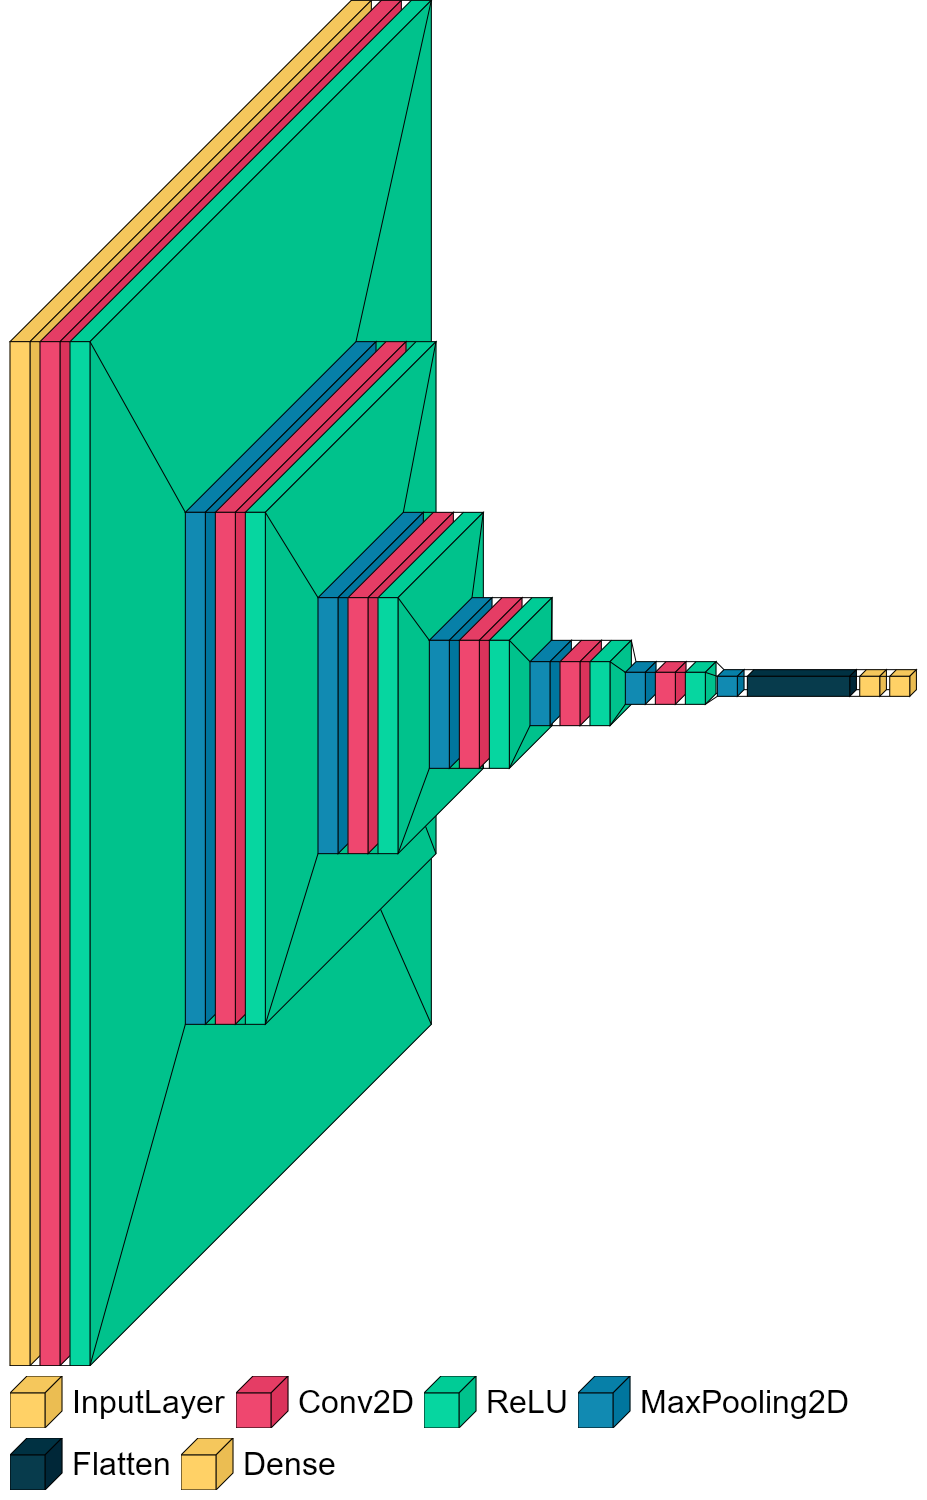

In [33]:
import visualkeras
from PIL import ImageFont

font = ImageFont.truetype("arial.ttf", 32) 
visualkeras.layered_view(model, legend=True, font=font, to_file='fallnet_architecture.png') 

In [34]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs = 1000, batch_size=16,validation_data = (X_val, y_val), callbacks=[es, mc])

Epoch 1/1000


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


729/729 [==============================] - ETA: 0s - loss: 0.9445 - accuracy: 0.7619
Epoch 1: val_accuracy improved from -inf to 0.76090, saving model to best_model.h5
729/729 [==============================] - 358s 489ms/step - loss: 0.9445 - accuracy: 0.7619 - val_loss: 0.5069 - val_accuracy: 0.7609
Epoch 2/1000
729/729 [==============================] - ETA: 0s - loss: 0.4559 - accuracy: 0.7948
Epoch 2: val_accuracy improved from 0.76090 to 0.81313, saving model to best_model.h5
729/729 [==============================] - 347s 476ms/step - loss: 0.4559 - accuracy: 0.7948 - val_loss: 0.4429 - val_accuracy: 0.8131
Epoch 3/1000
729/729 [==============================] - ETA: 0s - loss: 0.3886 - accuracy: 0.8360
Epoch 3: val_accuracy improved from 0.81313 to 0.83693, saving model to best_model.h5
729/729 [==============================] - 354s 485ms/step - loss: 0.3886 - accuracy: 0.8360 - val_loss: 0.3729 - val_accuracy: 0.8369
Epoch 4/1000
729/729 [==============================] - ETA

Epoch 29/1000
729/729 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5083
Epoch 29: val_accuracy did not improve from 0.91337
729/729 [==============================] - 349s 479ms/step - loss: 0.6931 - accuracy: 0.5083 - val_loss: 0.6929 - val_accuracy: 0.5118
Epoch 30/1000
729/729 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5107
Epoch 30: val_accuracy did not improve from 0.91337
729/729 [==============================] - 350s 480ms/step - loss: 0.6930 - accuracy: 0.5107 - val_loss: 0.6929 - val_accuracy: 0.5118
Epoch 31/1000
729/729 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5060
Epoch 31: val_accuracy did not improve from 0.91337
729/729 [==============================] - 350s 480ms/step - loss: 0.6930 - accuracy: 0.5060 - val_loss: 0.6933 - val_accuracy: 0.4882
Epoch 32/1000
729/729 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5115
Epoch 32: val_accuracy did not improve from

Epoch 58/1000
729/729 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5103
Epoch 58: val_accuracy did not improve from 0.91337
729/729 [==============================] - 352s 482ms/step - loss: 0.6932 - accuracy: 0.5103 - val_loss: 0.6929 - val_accuracy: 0.5118
Epoch 59/1000
729/729 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5091
Epoch 59: val_accuracy did not improve from 0.91337
729/729 [==============================] - 350s 481ms/step - loss: 0.6932 - accuracy: 0.5091 - val_loss: 0.6929 - val_accuracy: 0.5118
Epoch 60/1000
729/729 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5097
Epoch 60: val_accuracy did not improve from 0.91337
729/729 [==============================] - 355s 487ms/step - loss: 0.6931 - accuracy: 0.5097 - val_loss: 0.6933 - val_accuracy: 0.4882
Epoch 61/1000
729/729 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5082
Epoch 61: val_accuracy did not improve from

## Accuracy/Loss vs Epochs

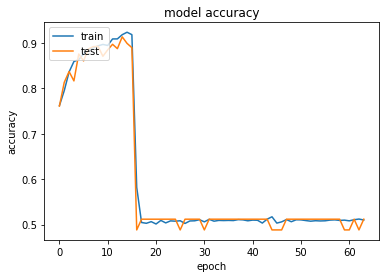

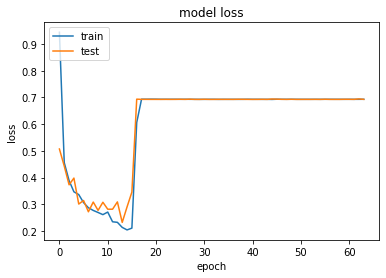

Weights saved.


In [36]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save('model.h5')
print('Weights saved.')

## Testing our model

In [10]:
from tensorflow import keras
model = keras.models.load_model(r'C:\Users\HP\Desktop\Fall\5Fall-Detection-using-CNN-Architecture\best_model.h5')

In [13]:
predicted_labels = (model.predict(test_images) >= 0.2).astype('int64').flatten()

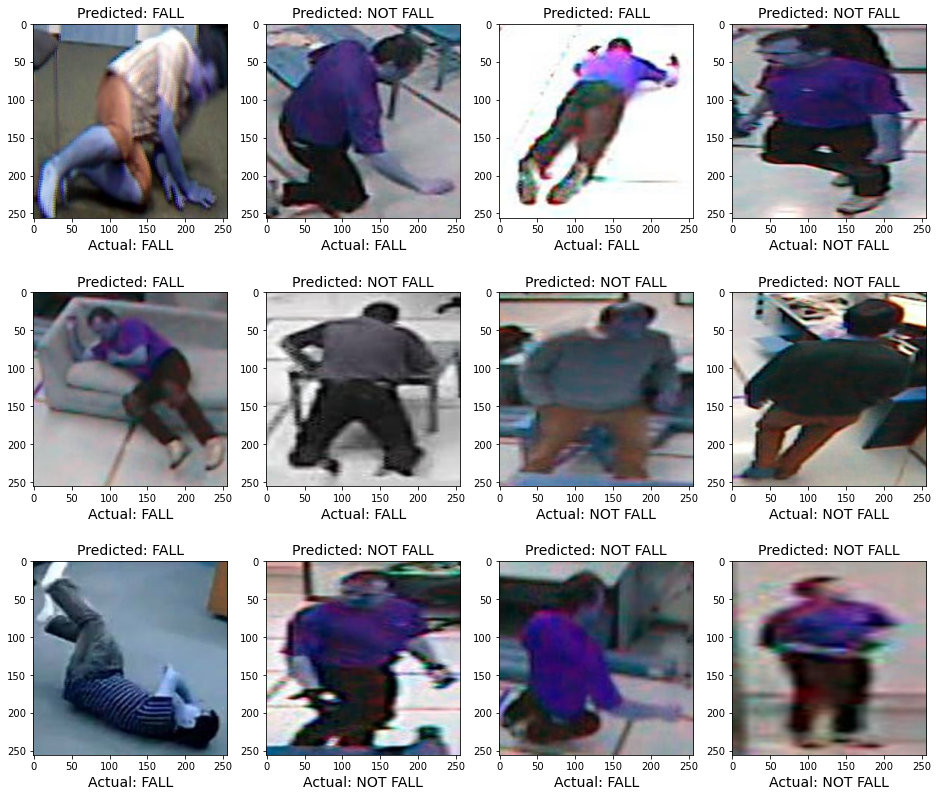

In [14]:
# visualizing our results
row = 3
col = 4
fig, axes = plt.subplots(row, col, figsize=(16, 14))
c = 0
for i in range(row):
    for j in range(col):
        axes[i][j].imshow(test_images[c])
        axes[i][j].set_title(f'Predicted: {get_label(predicted_labels[c])}', fontsize=14)
        axes[i][j].set_xlabel(f'Actual: {get_label(test_labels[c])}', fontsize=14)
        c += 1